<a href="https://colab.research.google.com/github/ucfilho/Raianars_SelfTest_July_2020/blob/master/Frank_Noisy_Quartic_jun_27_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Noisy_Quartic
# In the paper Ngen=3000
# JADE: Adaptive Differential Evolution with Optional External Archive

In [ ]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

fatal: destination path 'Raianars_paper_One' already exists and is not an empty directory.
/content/Raianars_paper_One


In [ ]:
import Go2Ann
import de_soma_Insight
import de_bounds_matriz
import Function
import Go2MinMax
from AvaliaX import AvaliaX
from GeraIndices import GeraIndices

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=3000 #10 # PONTOS quantas vezes vai alteral NPAR 

mut=0.5
crossp=0.5
Fi=mut;CRi=crossp;# para impressão

############################### Função
dim=30

#fchoice='Rastrigin' #fchoice='Michalewicz' #fchoice='Schwefel'
fchoice='Noisy_Quartic'
Fun=Function.Noisy_Quartic

MIN,MAX=Go2MinMax.Intervalo(dim,fchoice)
PAR=len(MAX) #NUM DE PARAMETROS A SER OTIMIZADOS


In [ ]:
import time
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

In [ ]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

fatal: destination path 'ANN_read_matrix' already exists and is not an empty directory.
/content/Raianars_paper_One/ANN_read_matrix


In [ ]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [ ]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [ ]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [ ]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [ ]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [ ]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [ ]:
##################################### 

#TOTAL=7*dim*its*ITE
TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

dimensions=len(MAX)
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO

p=int(TOTAL/its/ITE)
#p=int(p/2) 
NPAR=p

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
for i in range(rodadas):
  SOMA=0
  pop = np.random.rand(NPAR, dimensions)
  diff=np.zeros(PAR)
  for ii in range(PAR):
    diff[ii] = MAX[ii]-MIN[ii]
  X = MIN + pop * diff
    
  PONTOS=ITE # DIVISOES DA POPULACAO
 
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  bounds=[(p, p)] * PONTOS




In [ ]:
#NPAR=int(NPAR/2)
start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for i in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    SOMAf=0
    start_ite = time.time()
    delta_time=(start_ite-start_time)/60
    print('ite=',i,'total=50','time=',delta_time)
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)
    for ii in range(PAR):
      diff[ii] = MAX[ii]-MIN[ii]
    X = MIN + pop * diff
    Xf = MIN + pop * diff
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind) for ind in X])

    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X,Fitness)
    nrow,ncol=X.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo
  
    MAT_INDo=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fun)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1

    
    for k in range(ITE):
      X,BEST,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR,its,Fun,X,SOMA,TOTAL)
      #Xf,BESTf,FOBESTf,XYf,BEST_XYf,SOMAf= de_soma_Insight.de(MAX,MIN, Fi, CRi, NPAR,its,Fun,Xf,SOMAf,TOTAL)

      
      MAT_IND=GeraIndices(X,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]

      Fitness = np.asarray([Fun(ind) for ind in X])
      #Fitnessf = np.asarray([Fun(ind) for ind in Xf])
      Maior=np.argmax(Fitness)
      #Maiorf=np.argmax(Fitnessf)
      Menor=np.argmin(Fitness)
      #Menorf=np.argmin(Fitnessf)

      #X[Maior,:]=np.copy(Xf[Menorf,:])
      #Xf[Maiorf,:]=np.copy(X[Menor,:])
      
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

ite= 0 total=50 time= 8.277098337809245e-06
ite= 1 total=50 time= 4.508869365851084
ite= 2 total=50 time= 8.907020457585652
ite= 3 total=50 time= 13.285387535889944
ite= 4 total=50 time= 17.698559685548148
ite= 5 total=50 time= 22.132086424032845
ite= 6 total=50 time= 26.50233195622762
ite= 7 total=50 time= 30.84112398227056
ite= 8 total=50 time= 35.14821068445841
ite= 9 total=50 time= 39.46212667624156
ite= 10 total=50 time= 43.77965682347615
ite= 11 total=50 time= 48.088174879550934
ite= 12 total=50 time= 52.39270800749461
ite= 13 total=50 time= 56.974066547552745
ite= 14 total=50 time= 61.73917169570923
ite= 15 total=50 time= 66.57244654893876
ite= 16 total=50 time= 71.41638848781585
ite= 17 total=50 time= 76.25868747234344
ite= 18 total=50 time= 81.09932245016098
ite= 19 total=50 time= 85.97589372396469
ite= 20 total=50 time= 90.86597719987233
ite= 21 total=50 time= 95.7458626627922
ite= 22 total=50 time= 100.65241961081823
ite= 23 total=50 time= 105.54117701848348
ite= 24 total=50

In [ ]:
# print(TOTAL)

In [ ]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [ ]:
pd.set_option('display.max_columns', 30)  
print(df)

      DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X     NP  \
0             3.999090     0.985620  0.000333         1.0      2.0  150.0   
1             3.926496     0.967729  0.000667         1.0      2.0  150.0   
2             3.853763     0.949803  0.001000         1.0      0.0  150.0   
3             3.782061     0.932131  0.001333         1.0      0.0  150.0   
4             3.735971     0.920772  0.001667         1.0      0.0  150.0   
...                ...          ...       ...         ...      ...    ...   
2995          0.565291     0.139322  0.998667         1.0      2.0  150.0   
2996          0.565673     0.139416  0.999000         1.0      2.0  150.0   
2997          0.566385     0.139592  0.999333         1.0      2.0  150.0   
2998          0.567718     0.139920  0.999667         1.0      2.0  150.0   
2999          0.568781     0.140182  1.000000         1.0      2.0  150.0   

            Fo       CRo       fmin        fmax  AD_fmin  AD_fmax  DELTA FO

Text(0, 0.5, 'CR')

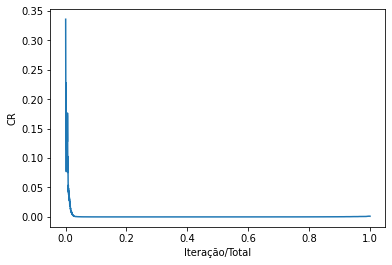

In [ ]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

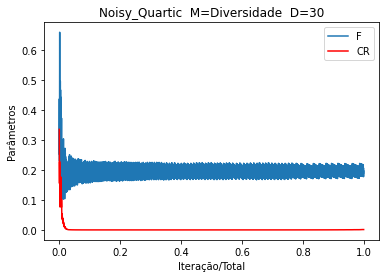

In [ ]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'Noisy_Quartic_Diversidade_D=30')

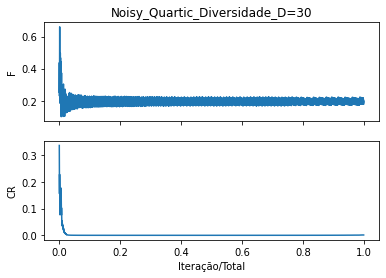

In [ ]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [ ]:
nome='_ANN_Div3x4_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('DE_POP_VAR_F_CR','TOTAL=',TOTAL,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1])
print('MIN __:',MINFO)
print('MAX__: ',MAXFO)
print('STD __:',STD)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

DE_POP_VAR_F_CR TOTAL= 450000 Iterações= 3000 Dim= 30 Min/Max= -1.28 / 1.28 _ Noisy_Quartic
_ANN_Div3x4_Fo-0.5_CRo-0.5_D-30_Interv-3000 

MÉDIA:  0.15615158936949505
MIN __: 0.04395081445690087
MAX__:  0.32060536774925924
STD __: 0.06312742666860824
Tempo Médio= 275.517 segundos ---
50 Rodadas

BEST:  [ 0.23217516 -0.11872275 -0.01866317  0.11468821  0.00502001  0.02809633
  0.12250366 -0.06618831 -0.02526227 -0.04999971  0.14946317 -0.06863553
  0.00750177 -0.09184753 -0.03016047  0.10370309 -0.08979253  0.04086547
 -0.01585778 -0.00421286 -0.06617248 -0.02769911  0.1759497   0.00568704
 -0.0078769  -0.07926611 -0.07817778 -0.06433024 -0.0731326   0.00611867
  0.04395081]
